In [1]:
import gpxpy
import mplleaflet
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['axes.xmargin'] = 0.1
plt.rcParams['axes.ymargin'] = 0.1
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("talk")

In [100]:
with open('../gpx/3-laender-giro.gpx') as fh:
    gpx_file = gpxpy.parse(fh)

In [101]:
print("File has {} track(s)".format(len(gpx_file.tracks)))

File has 1 track(s)


In [102]:
track = gpx_file.tracks[0]
print("Track has {} segment(s)".format(len(track.segments)))

Track has 1 segment(s)


GPX segments can be easily converted to a Pandas dataframe

In [103]:
segment = track.segments[0]
coords = pd.DataFrame([{'lat': p.latitude, 
                        'lon': p.longitude, 
                        'ele': p.elevation,
                        'time': p.time} for p in segment.points])
coords.head()

,ele,lat,lon,time
0,1343.0,46.889062,10.502119,2016-06-26 04:31:27
1,1343.0,46.889062,10.502119,2016-06-26 04:31:28
2,1343.0,46.889062,10.502119,2016-06-26 04:31:29
3,1344.0,46.889065,10.502119,2016-06-26 04:31:30
4,1345.0,46.889068,10.502121,2016-06-26 04:31:31


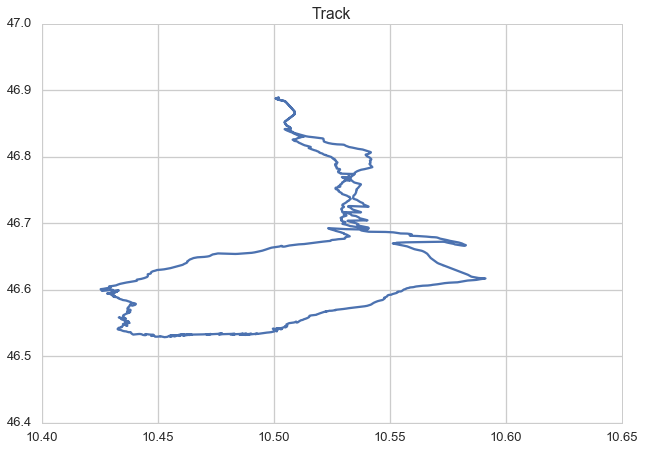

In [104]:
plt.plot(coords['lon'].values, coords['lat'].values)
plt.title("Track")

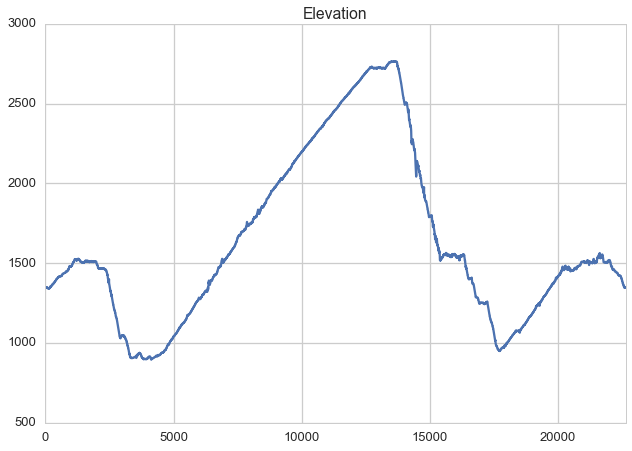

In [105]:
coords.ele.plot(title='Elevation')

In [106]:
segment.points[0].speed = 0.0
segment.points[-1].speed = 0.0
gpx_file.add_missing_speeds()

In [107]:
coords['speed'] = [p.speed for p in segment.points]

In [108]:
start_time, end_time = segment.get_time_bounds()
duration = end_time - start_time

In [109]:
average_speed = segment.length_3d() / duration.seconds * 3.6
print("Average speed is {} km/h".format(average_speed))

Average speed is 20.052148848602695 km/h


In [114]:
segment.get_uphill_downhill()

UphillDownhill(uphill=4446.100000000043, downhill=4439.100000000031)

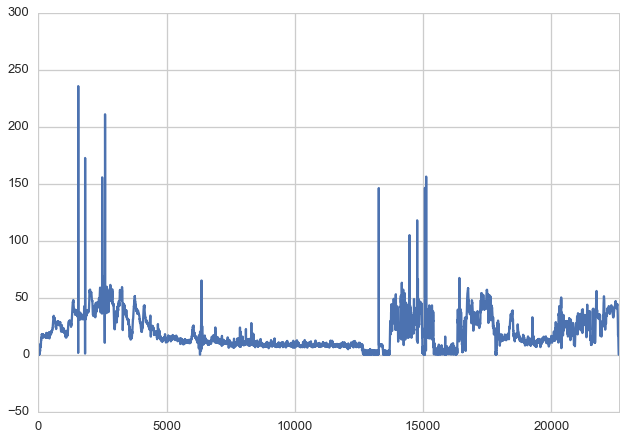

In [111]:
coords.speed *= 3.6
coords.speed.plot()